# ANOMALY DETECTION: FRAUD DETECTION
 In this project we are going to implement Gaussian Mixtue models to detect fraudulent transactions in a creditcard dataset.



We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

We load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. We then print out the first few columns of the dataset.

* Number of rows = **284807**
* Other features in the dataset:  "**Time**" and "**Amount**"
* Target variable = **'Class'** = {**0**: **Legel transaction**, **1**: **Fraud transaction**}

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=8a1031a1d6e5dbf7d13c71e547276214e442f0bdf565424b9d1403bb8436b688
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,rows
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284802
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284803
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284804
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284805
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,284806


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()/len(df)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

**Note**: It's important when looking at a new dataset to figure out how many examples we have for each class.

* 99.83% for Class #0 (Valid transaction) and 0.17% for class #1 (Fraud transaction)
* The dataset is obviously Unbalanaced, since the number of occurenace of classes are significantly different.
* Imbalanced dataset can cause overfit or even end up in a model that does not fulfil what it is built for. In other words, for a case of fraud detection where number of fraud cases are way lower than legitimate transactions, training a model on such imbalanced dataset will result a model that can well predict legitimate transactions, but fails to detect fraud cases since it has not seen enough number of fraud cases in its training stage.



Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

As mentioned earlier, in this project we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.


In [ ]:
### Split the data  ###
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-2]],df['Class'],test_size = 1/3,random_state=1)

In [ ]:
from scipy import stats

norm = stats.norm(

    loc = X_train['V11'].mean(),
    scale = X_train['V11'].std()

)

In [ ]:
print('mean of variable V11 is : ', norm.mean())
print('standard deviation of variable V11 is : ', norm.std())

mean of variable V11 is :  0.00035766414366559087
standard deviation of variable V11 is :  1.0223643421929292


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


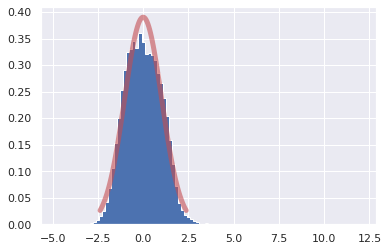

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()



We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

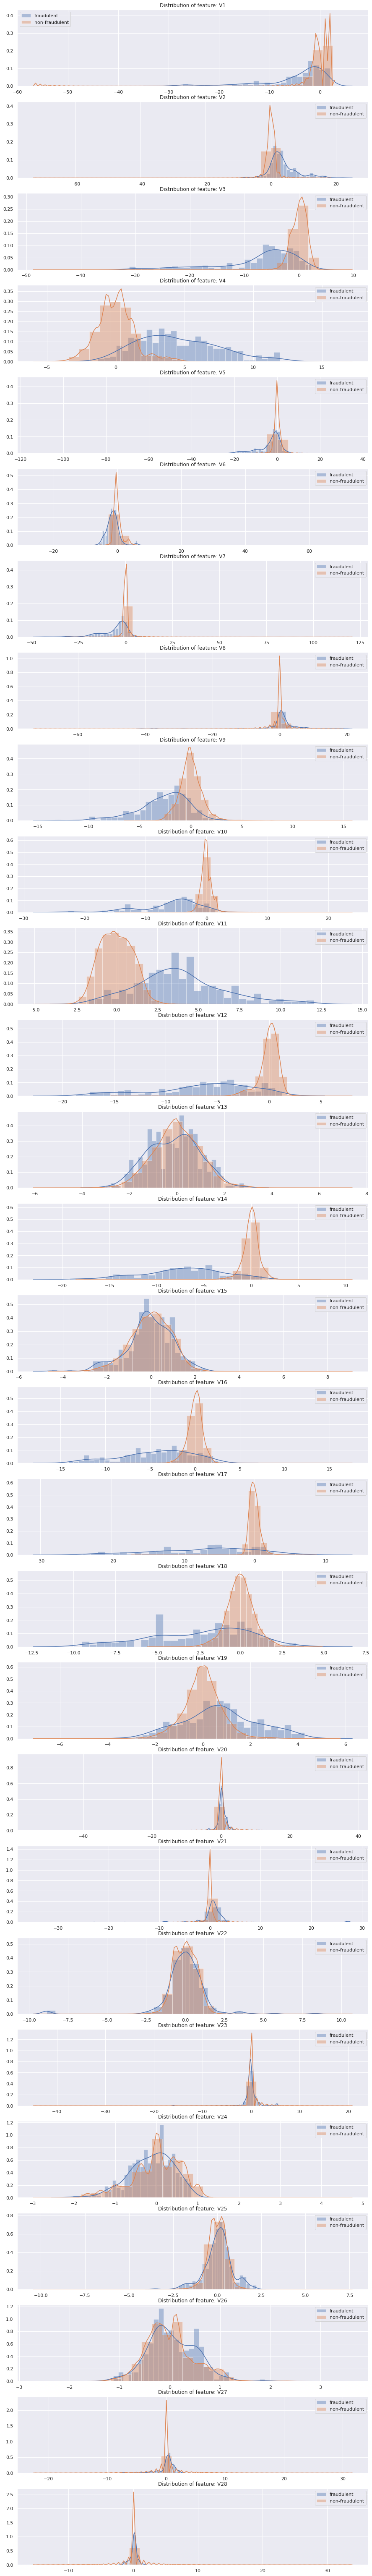

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Note**: These graphs plot the histogram (approximate PDF) for each of the 28 features for valid and fraud transactions. By these graphs, we can identify for what features, the PDFs of valid and fraud transactions are noticably apart and hence, those features can better differentiate, say classify, transactions and detect anamolies. For such features, better precision, recall, and roc_auc scores are obtained. For example, for **V12** adn **V14**, this difference is noticable and thus, they can better detect anamolies. On the other hand, for some variables, e.g., **V13**, **V15**, **V22**, the PDF of both classes of transactions are quite simialr and thus those features do not give any meaniningful information with regards to fraud detection. We need to fit a gaussian model to our data for one of those features, e.g., V12 or V14, define a threshold, and flag those tranactions that are beyond the threshold as fraud.

## 2. Single Variable Gaussian Distribution
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve)
  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  


2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * We build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.



In [ ]:
# One Gaussian 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve,precision_score,average_precision_score,recall_score,f1_score

### 2.1 ROC curve and AUC score for each feature (one Gaussian)

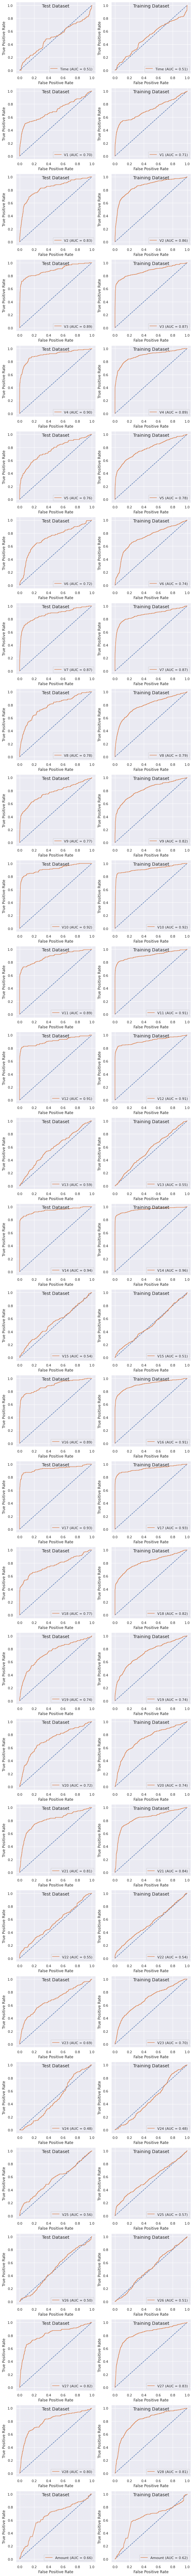

In [ ]:
features=[f for f in X_train.columns]
roc_auc_score_list = []
nplots=np.size(features)
plt.figure(figsize=(10,5*nplots))
gs = gridspec.GridSpec(nplots,2)
for i, feat in enumerate(features):
    

    gm1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
    
    # training the model on non-fraudulent transactions
    gm1.fit(X_train[y_train == 0][[feat]].values)
    c_train = gm1.score_samples(X_train[[feat]])
    c_test = gm1.score_samples(X_test[[feat]])

    fpr_train,tpr_train,threshold_train = roc_curve(y_train,1-c_train)
    fpr_test,tpr_test,threshold_test = roc_curve(y_test,1-c_test)

    score_train = roc_auc_score(y_train,1-c_train)
    score_test = roc_auc_score(y_test,1-c_test)

    roc_auc_score_list.append(score_train)

    ax_test = plt.subplot(gs[2*i])
    plt.plot([0,1], [0,1], linestyle='--')
    plt.plot(fpr_test, tpr_test, label= feat + ' (AUC = %0.2f)' %score_test )
    
    plt.title('Test Dataset',size=14,y=+0.9)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    ax_train = plt.subplot(gs[2*i+1])
    plt.plot([0,1], [0,1], linestyle='--')
    plt.plot(fpr_train, tpr_train, label= feat + ' (AUC = %0.2f)' %score_train )
    
    plt.title('Training Dataset',size=14,y=+0.9)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')




In [ ]:
df_auc_score = pd.DataFrame(roc_auc_score_list, index = X_train.columns,columns=['auc_score'])
df_auc_score_sorted = df_auc_score.sort_values(by=['auc_score'],ascending=False)
df_auc_score_sorted

,auc_score
V14,0.957095
V17,0.931163
V10,0.917244
V12,0.912987
V16,0.910871
V11,0.908353
V4,0.890087
V3,0.873517
V7,0.867762
V2,0.859072


Text(0, 0.5, 'Test AUC Score')

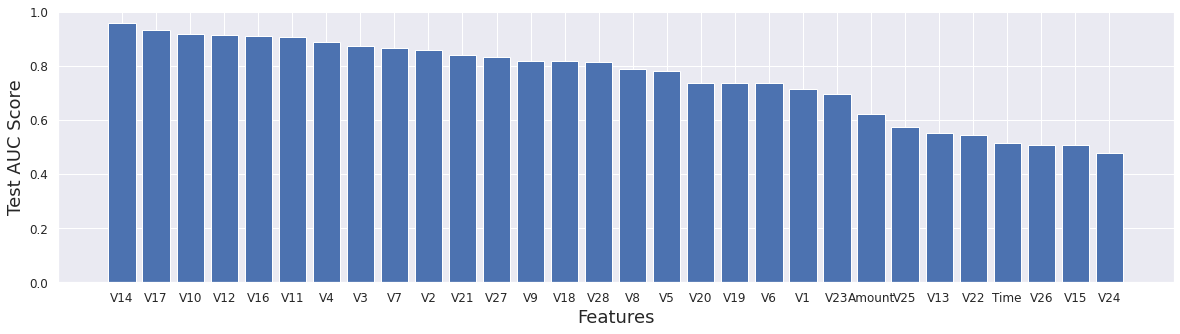

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(x=df_auc_score_sorted.index,height=df_auc_score_sorted['auc_score'])
plt.plot()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Features',size = 18)
plt.ylabel('Test AUC Score',size = 18)

### 2.2 Finding the optimal threshold for each feature (one Gaussian)

In [ ]:
gmm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  
best_feature = 'V14'
# training the model on non-fraudulent transactions
gmm.fit(X_train[y_train == 0][[best_feature]].values)
c = gmm.score_samples(X_train[[best_feature]])

In [ ]:
a=[1,4,3,0,5,-1]
sorted(a)

[-1, 0, 1, 3, 4, 5]

In [ ]:
def optimal_threshold(y_train, c, num_c):

    f1_score_list = []
    pr_score_list = []
    re_score_list = []

    c_space = np.linspace(0,len(c)-1,num_c,dtype=int)


    for i in c_space:

        mn = sorted(c)[i]
        f1 = f1_score(
                y_train, c<=mn
            )
        
        pr = precision_score(
                y_train, c<=mn
            )
        
        re = 1/(2/f1-1/pr)

        f1_score_list.append(f1)
        pr_score_list.append(pr)
        re_score_list.append(re)

    highest_score = np.max(f1_score_list)
    best_k = np.argmax(f1_score_list)
    optimal_C = np.array(sorted(c))[c_space][best_k]

    return optimal_C,highest_score, f1_score_list,pr_score_list,re_score_list,c_space


In [ ]:
optimal_C,highest_score, f1_score_list,pr_score_list,re_score_list,c_space = optimal_threshold (y_train, c, 1000)

#hardcode the above values for 1000 iterations of threshold values
# highest_score = 0.5955678670360112
# optimal_C = -18.98438197983841

In [ ]:
print('Highest achieved f1 score on training set is %0.2f' %highest_score)
print('Optimal threshold is %0.2f' %optimal_C,'\n')

Highest achieved f1 score on training set is 0.60
Optimal threshold is -18.98 



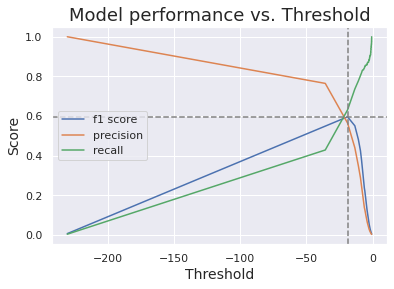

In [ ]:
plt.plot(np.array(sorted(c))[c_space],f1_score_list,label = 'f1 score')
plt.plot(np.array(sorted(c))[c_space],pr_score_list , label = 'precision')
plt.plot(np.array(sorted(c))[c_space],re_score_list , label = 'recall')
plt.axhline(highest_score, linestyle='--', color='.5')
plt.axvline(optimal_C, linestyle='--', color='.5')

plt.title('Model performance vs. Threshold',size=18)
plt.xlabel('Threshold',size=14)
plt.ylabel('Score',size=14)

plt.legend()


### 2.3 Test performance (one Gaussian)

In [ ]:
c_test = gmm.score_samples(X_test[[best_feature]])

In [ ]:
f1_test = f1_score(
        y_test, c_test<=optimal_C
    )

pr_test = precision_score(
        y_test, c_test<=optimal_C
    )

re_test = recall_score(
        y_test, c_test<=optimal_C
    )

fpr,tpr,threshold = roc_curve(y_test,1-c_test)
auc_score_test = roc_auc_score(y_test,1-c_test)


In [ ]:
print('The f1 score on the Test dataset is %0.2f' %f1_test)
print('The precision score on the Test dataset is %0.2f' %pr_test)
print('The recall score on the Test dataset is %0.2f' %re_test)
print('The test auc score is %0.2f' %auc_score_test)

The f1 score on the Test dataset is 0.57
The precision score on the Test dataset is 0.55
The recall score on the Test dataset is 0.59
The test auc score is 0.94


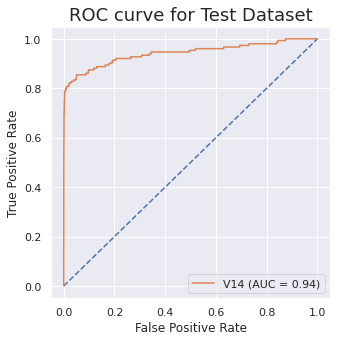

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

### 2.4 Two Guassians

In [ ]:
# Two Gaussians
gmm_Notfraud = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

gmm_fraud = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  
best_feature = 'V14'

# Training the model 
gmm_Notfraud.fit(X_train[y_train == 0][[best_feature]].values)

gmm_fraud.fit(X_train[y_train == 1][[best_feature]].values)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
c_Notfraud_train = gmm_Notfraud.score_samples(X_train[[best_feature]])
c_fraud_train = gmm_fraud.score_samples(X_train[[best_feature]])


# scale the scores, so that we can compare them
c_Notfraud_train_scaled = c_Notfraud_train/c_Notfraud_train.min()
c_fraud_train_scaled = c_fraud_train/c_fraud_train.min()

f1_score_train_2Gaussian = f1_score(y_train, c_fraud_train_scaled < c_Notfraud_train_scaled)
print('The f1 score on the Train dataset is %0.2f' %f1_score_train_2Gaussian)


The f1 score on the Train dataset is 0.41


In [ ]:
c_Notfraud_test = gmm_Notfraud.score_samples(X_test[[best_feature]])
c_fraud_test = gmm_fraud.score_samples(X_test[[best_feature]])


# scale the scores, so that we can compare them
c_Notfraud_test_scaled = c_Notfraud_test/c_Notfraud_test.min()
c_fraud_test_scaled = c_fraud_test/c_fraud_test.min()

In [ ]:
f1_score_2Gaussian = f1_score(y_test, c_fraud_test_scaled < c_Notfraud_test_scaled)
pr_score_2Gaussian = precision_score(y_test, c_fraud_test_scaled < c_Notfraud_test_scaled)
re_score_2Gaussian = recall_score(y_test, c_fraud_test_scaled < c_Notfraud_test_scaled)

print('The f1 score on the Test dataset is %0.2f' %f1_score_2Gaussian)
print('The precision score on the Test dataset is %0.2f' %pr_score_2Gaussian)
print('The recall score on the Test dataset is %0.2f' %re_score_2Gaussian)

The f1 score on the Test dataset is 0.36
The precision score on the Test dataset is 0.85
The recall score on the Test dataset is 0.23


### **Part 2: Discussion**
- For a one single component Gaussian model, the **top features**, i.e., those that resulted in highest roc_auc_scores, were **V14**, **V17**, **V10**, **V12**, **V16**, respectively.
<br> And the **worst features** were: **V24**, **V15**, **V26**, **Time**, **V22**. Those are the ones for which the pdf of valid and fraud tranactions qre quite similar and thus, those features cannot propoerlt differentiates transactions. 
- The single component Gaussian model which employed the top feature (**V14**) and fit on non-fraudulent transactions.To build that model 1000 iterations of threshold were examined to find the optimal threshold, i.e., the one that could yield highest f1 score on the training data set, which obtained as 0.6. This model resulted in f1 score of 0.57 on the test dataset. The precision and recall scores were 0.55 and 0.59, respectively.
- The two single comoponent Gaussian models resulted in 0.41 f1 score on the training dataset and 0.36 on test dataset. This shows that this model cannot well predict the fraud transactions, compared to the one Gaussian model.
- One way to increase the model is to increase the number of iterations to find the optimal threshold. However, this is computationally expensive and time consuming.

**Comparison**: First, let's take a look at the performance of the above two approaches: One Gaussian model vs. Two Gaussian models.

As obvious, the one Gaussian model results in a better f1 score and recall score. However, the precision of two Garssian model was higher. This means that two Gassian model, although it can precislely detect Frauds, it cannot detect the majority of fraud transacions and it has a high rate of False Negative.

In [ ]:
model_comparison1 = [[f1_test , pr_test, re_test],[f1_score_2Gaussian,pr_score_2Gaussian,re_score_2Gaussian ]]
model_coparison_df1_columns = ['f1_score Test', 'Precision Score Test','Recal Score Test']
index1 = ['One Gaussian','Two Gaussian']
model_coparison_df1 = pd.DataFrame(model_comparison1,columns=model_coparison_df1_columns,index = index1)
model_coparison_df1

,f1_score Test,Precision Score Test,Recal Score Test
One Gaussian,0.570513,0.552795,0.589404
Two Gaussian,0.364583,0.853659,0.231788


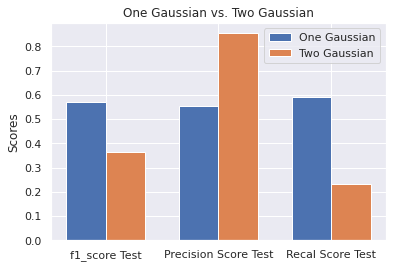

In [ ]:
labels = model_coparison_df1_columns
g1_means = model_coparison_df1.loc['One Gaussian']
g2_means = model_coparison_df1.loc['Two Gaussian']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1_means, width, label='One Gaussian')
rects2 = ax.bar(x + width/2, g2_means, width, label='Two Gaussian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('One Gaussian vs. Two Gaussian')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


## 3. Multivariate and Mixture of Gaussian Distribution
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design our model, we can benefit from:

*   Any number of features we want (multivariate).
*   We can fit our Gaussians only on non-fraudulent transactions or to both classes.
*   To fit our model, we can take advantage of the Gaussian mixture model where we can set the number of components.

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.

 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)

### Explore the data (Top 2 features based on part 2.1)
Here we take a look at the data using the top 2 features obtained in part 2.1, which are **V14** and **V17**

Text(0, 0.5, 'V17')

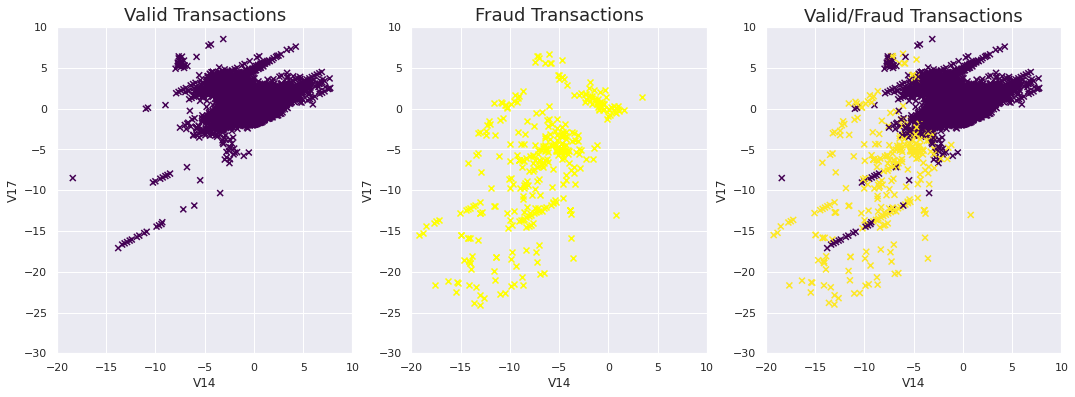

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Valid Transactions',size=18)
plt.scatter(X_train[y_train == 0]['V14'],X_train[y_train == 0]['V17'],c=y_train[y_train == 0],cmap='viridis',marker='x')

plt.xlim([-20,10])
plt.ylim([-30,10])

plt.xlabel('V14')
plt.ylabel('V17')


plt.subplot(1,3,2)
plt.title('Fraud Transactions',size=18)
plt.scatter(X_train[y_train == 1]['V14'],X_train[y_train == 1]['V17'],c='yellow',cmap='viridis',marker='x')
plt.xlim([-20,10])
plt.ylim([-30,10])

plt.xlabel('V14')
plt.ylabel('V17')

plt.subplot(1,3,3)
plt.title('Valid/Fraud Transactions',size=18)
plt.scatter(X_train['V14'],X_train['V17'],c=y_train,cmap='viridis',marker='x')

plt.xlim([-20,10])
plt.ylim([-30,10])

plt.xlabel('V14')
plt.ylabel('V17')


**Note**: It is somewhat clear that the valid transactions have a bi-model distribution and hence, it might be better to use a Gaussian mixture model with 2 components. In the following models it is examined if a 2-component model has an improvement over 1-component model or not.

In [ ]:
model_comparison = []
model_coparison_df_columns = ['Features', '#Gaussian Models', '#Components', 'Oversampled','Train on', 'f1_score Training','f1_score Test','precision test','recall score test']


In [ ]:
# model_coparison_df['features'].append(a[0])
# model_coparison_df

### 1st model: One 1-component Gaussian with 3 features 
**Features**: Top 3 features based on part 2.1
<br> **Training**: Train only on non-fraudulent transactions
<br> **Gaussian model**: 1 Gaussian model with 1 component


In [ ]:
gmm_m1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )

m1_features = ['V14','V17','V10']
gmm_m1.fit(X_train[y_train == 0][m1_features].values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
c_m1 = gmm_m1.score_samples(X_train[m1_features].values)

In [ ]:
# optimal_C_m1,highest_score_m1, _,_,_,_ = optimal_threshold(y_train, c_m1,1000)

#hardcode optimal C and highest score
highest_score_m1 = 0.6260387811634349
optimal_C_m1 = -59.74616566800666

print('The highest f1 score on the Training dataset is %0.2f' %highest_score_m1)

The highest f1 score on the Training dataset is 0.63


In [ ]:
c_test_m1 = gmm_m1.score_samples(X_test[m1_features].values)
f1_test_m1 = f1_score(
        y_test, c_test_m1<=optimal_C_m1
    )

pr_test_m1 = precision_score(
        y_test, c_test_m1<=optimal_C_m1
    )

re_test_m1 = recall_score(
        y_test, c_test_m1<=optimal_C_m1
    )

fpr_m1,tpr_m1,threshold_m1 = roc_curve(y_test,1-c_test_m1)
auc_score_test_m1 = roc_auc_score(y_test,1-c_test_m1)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m1)
print('The precision score on the Test dataset is %0.2f' %pr_test_m1)
print('The recall score on the Test dataset is %0.2f' %re_test_m1)
print('The test auc score is %0.2f' %auc_score_test_m1)

The f1 score on the Test dataset is 0.57
The precision score on the Test dataset is 0.54
The recall score on the Test dataset is 0.61
The test auc score is 0.97


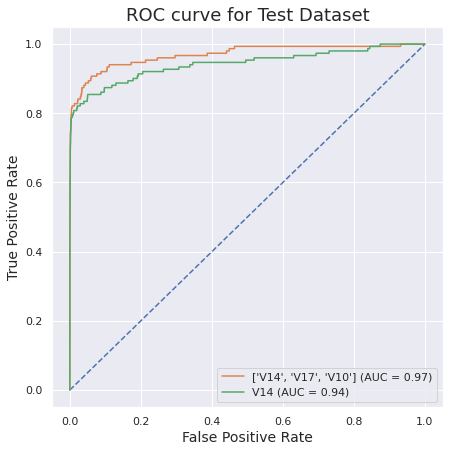

In [ ]:
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m1, tpr_m1, label= str(m1_features)+ ' (AUC = %0.2f)' %auc_score_test_m1 )
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')


In [ ]:
# Characteritics and performance of model 1
model1 = [m1_features, 1, 1, False,'Valid Transactions', highest_score_m1,f1_test_m1,pr_test_m1,re_test_m1]

### 2nd model: One 2-component Gaussian with 3 features
**Features**: Top 3 feature (obtained based on 2 component gm model)
<br> **Training**: Train only on non-fraudulent transactions
<br> **Gaussian model**: 1 Gaussian model with 2 component

In [ ]:
features=[f for f in X_train.columns]
roc_auc_score_list_m2 = []

for i, feat in enumerate(features):
    gm_m2 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
    
    # training the model on non-fraudulent transactions
    gm_m2.fit(X_train[y_train == 0][[feat]].values)
    c_m2 = gm_m2.score_samples(X_train[[feat]])

    score_m2 = roc_auc_score(y_train,1-c_m2)
    roc_auc_score_list_m2.append(score_m2)

In [ ]:
df_auc_score_m2 = pd.DataFrame(roc_auc_score_list_m2, index = X_train.columns,columns=['auc_score'])
df_auc_score_sorted_m2 = df_auc_score_m2.sort_values(by=['auc_score'],ascending=False)
df_auc_score_sorted_m2.head(5)

,auc_score
V14,0.957863
V17,0.936535
V12,0.924284
V10,0.919549
V11,0.908686


In [ ]:
gmm_m2 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
  
m2_features = ['V14','V17','V12']
# training the model on non-fraudulent transactions
gmm_m2.fit(X_train[y_train == 0][m2_features].values)
c_m2 = gmm_m2.score_samples(X_train[m2_features])

In [ ]:
# optimal_C_m2,highest_score_m2, _,_,_,_ = optimal_threshold(y_train, c_m2, 1000)

#hardcode optimal C and highest score
highest_score_m2 = 0.7285318559556787
optimal_C_m2 = -22.63635922467117

In [ ]:
c_test_m2 = gmm_m2.score_samples(X_test[m2_features].values)
f1_test_m2 = f1_score(
        y_test, c_test_m2<=optimal_C_m2
    )

pr_test_m2 = precision_score(
        y_test, c_test_m2<=optimal_C_m2
    )

re_test_m2 = recall_score(
        y_test, c_test_m2<=optimal_C_m2
    )

fpr_m2,tpr_m2,threshold_m2 = roc_curve(y_test,1-c_test_m2)
auc_score_test_m2 = roc_auc_score(y_test,1-c_test_m2)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m2)
print('The precision score on the Test dataset is %0.2f' %pr_test_m2)
print('The recall score on the Test dataset is %0.2f' %re_test_m2)
print('The test auc score is %0.2f' %auc_score_test_m2)

The f1 score on the Test dataset is 0.68
The precision score on the Test dataset is 0.63
The recall score on the Test dataset is 0.74
The test auc score is 0.97


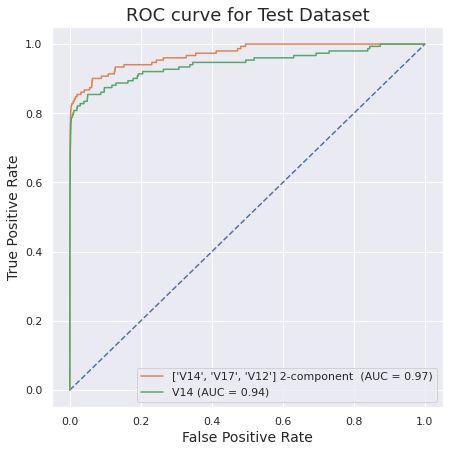

In [ ]:
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m2, tpr_m2, label= str(m2_features)+ ' 2-component ' + ' (AUC = %0.2f)' %auc_score_test_m2 )
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')

In [ ]:
# Characteritics and performance of model 2
model2 = [m2_features, 1, 2, False,'Valid Transactions', highest_score_m2,f1_test_m2,pr_test_m2,re_test_m2]

### 3rd model: One 2-component Gaussian with 5 features 
**Features**: Top 3 feature (obtained based on 2 component gm model)
<br> **Training**: Train only on non-fraudulent transactions
<br> **Gaussian model**: 1 Gaussian model with 2 component

In [ ]:
gmm_m3 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
  
m3_features = ['V14','V17','V12','V10','V11']
# training the model on non-fraudulent transactions
gmm_m3.fit(X_train[y_train == 0][m3_features].values)
c_m3 = gmm_m3.score_samples(X_train[m3_features])

In [ ]:
# optimal_C_m3,highest_score_m3, _,_,_,_ = optimal_threshold(y_train, c_m3,1000)

# #hardcode optimal C and highest score
highest_score_m3 = 0.7172413793103448
optimal_C_m3 = -31.114311878139908

In [ ]:
c_test_m3 = gmm_m3.score_samples(X_test[m3_features].values)
f1_test_m3 = f1_score(
        y_test, c_test_m3<=optimal_C_m3
    )

pr_test_m3 = precision_score(
        y_test, c_test_m3<=optimal_C_m3
    )

re_test_m3 = recall_score(
        y_test, c_test_m3<=optimal_C_m3
    )

fpr_m3,tpr_m3,threshold_m3 = roc_curve(y_test,1-c_test_m3)
auc_score_test_m3 = roc_auc_score(y_test,1-c_test_m3)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m3)
print('The precision score on the Test dataset is %0.2f' %pr_test_m3)
print('The recall score on the Test dataset is %0.2f' %re_test_m3)
print('The test auc score is %0.2f' %auc_score_test_m3)

The f1 score on the Test dataset is 0.69
The precision score on the Test dataset is 0.65
The recall score on the Test dataset is 0.73
The test auc score is 0.97


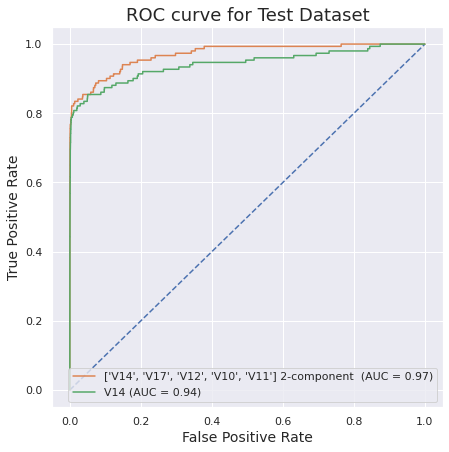

In [ ]:
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m3, tpr_m3, label= str(m3_features)+ ' 2-component ' + ' (AUC = %0.2f)' %auc_score_test_m3 )
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')

In [ ]:
# Characteritics and performance of model 3
model3 = [m3_features, 1, 2, False,'Valid Transactions', highest_score_m3,f1_test_m3,pr_test_m3,re_test_m3]

### 4th model: One 2-component Gaussian with 5 features (data oversampled)
**Preprocessing**: Over sampling fraud data to have a balanced dataset of fraud and valid transactions
<br> **Features**: Top 3 feature (obtained based on 2 component gm model)
<br> **Training**: Train only on All transactions
<br> **Gaussian model**: 1 Gaussian model with 2 component

In [ ]:
# Oversampling fraud data
from imblearn.over_sampling import RandomOverSampler
overSampler = RandomOverSampler(random_state = 0)
X_train_r_array, y_train_r = overSampler.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_r = pd.DataFrame(X_train_r_array,columns=X_train.columns)
X_train_r.shape

(379060, 30)

In [ ]:
#Find the best features
features=[f for f in X_train_r.columns]
roc_auc_score_list_m4 = []

for i, feat in enumerate(features):
    gm_m4 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
    
    # train_ring the model on non-fraudulent transactions
    gm_m4.fit(X_train_r[[feat]].values)
    c_m4 = gm_m4.score_samples(X_train_r[[feat]])

    score_m4 = roc_auc_score(y_train_r,1-c_m4)
    roc_auc_score_list_m4.append(score_m4)

In [ ]:
df_auc_score_m4 = pd.DataFrame(roc_auc_score_list_m4, index = X_train.columns,columns=['auc_score'])
df_auc_score_sorted_m4 = df_auc_score_m4.sort_values(by=['auc_score'],ascending=False)
df_auc_score_sorted_m4.head(5)

,auc_score
V17,0.917932
V16,0.904622
V14,0.901744
V10,0.880839
V12,0.868322


In [ ]:
gmm_m4 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

m4_features = ['V17', 'V16', 'V14', 'V10', 'V12']
# training the model on non-fraudulent transactions
gmm_m4.fit(X_train_r[m4_features].values)
c_m4 = gmm_m4.score_samples(X_train_r[m4_features])

In [ ]:
# optimal_C_m4,highest_score_m4, _,_,_,_ = optimal_threshold(y_train_r, c_m4,1000)

#hardcode optimal C and highest score
highest_score_m4 = 0.9032278499388954
optimal_C_m4 = -10.246926266257786

print('The highest f1 score on the Training dataset is %0.2f' %highest_score_m4)

The highest f1 score on the Training dataset is 0.90


In [ ]:
c_test_m4 = gmm_m4.score_samples(X_test[m4_features].values)
f1_test_m4 = f1_score(
        y_test, c_test_m4<=optimal_C_m4
    )

pr_test_m4 = precision_score(
        y_test, c_test_m4<=optimal_C_m4
    )

re_test_m4 = recall_score(
        y_test, c_test_m4<=optimal_C_m4
    )

fpr_m4,tpr_m4,threshold_m4 = roc_curve(y_test,1-c_test_m4)
auc_score_test_m4 = roc_auc_score(y_test,1-c_test_m4)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m4)
print('The precision score on the Test dataset is %0.2f' %pr_test_m4)
print('The recall score on the Test dataset is %0.2f' %re_test_m4)
print('The test auc score is %0.2f' %auc_score_test_m4)

The f1 score on the Test dataset is 0.03
The precision score on the Test dataset is 0.02
The recall score on the Test dataset is 0.89
The test auc score is 0.93


In [ ]:
c_test_m4 = gmm_m4.score_samples(X_test[m4_features].values)
f1_test_m4 = f1_score(
        y_test, c_test_m4<=optimal_C_m4
    )

pr_test_m4 = precision_score(
        y_test, c_test_m4<=optimal_C_m4
    )

re_test_m4 = recall_score(
        y_test, c_test_m4<=optimal_C_m4
    )

fpr_m4,tpr_m4,threshold_m4 = roc_curve(y_test,1-c_test_m4)
auc_score_test_m4 = roc_auc_score(y_test,1-c_test_m4)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m4)
print('The precision score on the Test dataset is %0.2f' %pr_test_m4)
print('The recall score on the Test dataset is %0.2f' %re_test_m4)
print('The test auc score is %0.2f' %auc_score_test_m4)

The f1 score on the Test dataset is 0.03
The precision score on the Test dataset is 0.02
The recall score on the Test dataset is 0.89
The test auc score is 0.93


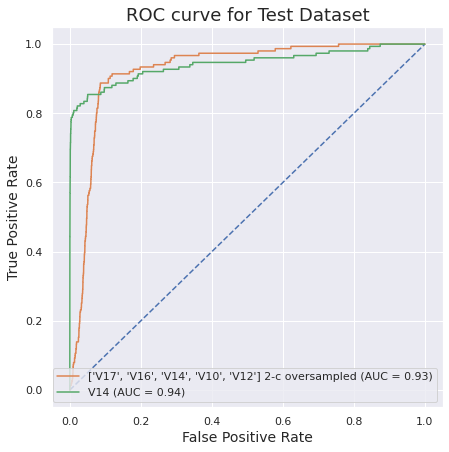

In [ ]:
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m4, tpr_m4, label= str(m4_features)+ ' 2-c oversampled' + ' (AUC = %0.2f)' %auc_score_test_m4 )
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')

In [ ]:
# Characteritics and performance of model 4
model4 = [m4_features, 1, 2, True,'All Transactions', highest_score_m4,f1_test_m4,pr_test_m4,re_test_m4]

### 5th model: Two Gaussians with 3 features
**Features**: Top 3 feature (obtained based on 2 component gm model)
<br> **Training**: Train separately on fraudulent and non-fraudulent transactions
<br> **Gaussian model**: 1 Gaussian model with 2 components on valid transactions and 1 Gaussian model with 1 component on Fraud transactions

In [ ]:
# Two Gaussians
gmm_Notfraud_m5 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gmm_fraud_m5 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  
m5_features = ['V14','V17','V10']

# Training the model 
gmm_Notfraud_m5.fit(X_train[y_train == 0][m5_features].values)

gmm_fraud_m5.fit(X_train[y_train == 1][m5_features].values)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
# Compute Trainig Score
c_Notfraud_train_m5 = gmm_Notfraud_m5.score_samples(X_train[m5_features])
c_fraud_train_m5 = gmm_fraud_m5.score_samples(X_train[m5_features])


# scale the scores, so that we can compare them
c_Notfraud_train_scaled_m5 = c_Notfraud_train_m5/c_Notfraud_train_m5.min()
c_fraud_train_scaled_m5 = c_fraud_train_m5/c_fraud_train_m5.min()

highest_score_m5 = f1_score(y_train, c_fraud_train_scaled_m5 < c_Notfraud_train_scaled_m5)

print('The highest f1 score on the Training dataset is %0.2f' %highest_score_m5)

The highest f1 score on the Training dataset is 0.67


In [ ]:
c_Notfraud_test_m5 = gmm_Notfraud_m5.score_samples(X_test[m5_features])
c_fraud_test_m5 = gmm_fraud_m5.score_samples(X_test[m5_features])


# scale the scores, so that we can compare them
c_Notfraud_test_scaled_m5 = c_Notfraud_test_m5/c_Notfraud_test_m5.min()
c_fraud_test_scaled_m5 = c_fraud_test_m5/c_fraud_test_m5.min()

In [ ]:
f1_test_m5 = f1_score(y_test, c_fraud_test_scaled_m5 < c_Notfraud_test_scaled_m5)
pr_test_m5 = precision_score(y_test, c_fraud_test_scaled_m5 < c_Notfraud_test_scaled_m5)
re_test_m5 = recall_score(y_test, c_fraud_test_scaled_m5 < c_Notfraud_test_scaled_m5)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m5)
print('The precision score on the Test dataset is %0.2f' %pr_test_m5)
print('The recall score on the Test dataset is %0.2f' %re_test_m5)

The f1 score on the Test dataset is 0.35
The precision score on the Test dataset is 0.81
The recall score on the Test dataset is 0.23


In [ ]:
# Characteritics and performance of model 5
model5 = [m5_features, 2, 2, False,'Valid/Fraud Transactions', highest_score_m5, f1_test_m5,pr_test_m5,re_test_m5]

### 6th model: One 3-component Gaussian with 3 features
**Features**: Top 3 feature (obtained based on 3 component gm model)
<br> **Training**: Train only on non-fraudulent transactions
<br> **Gaussian model**: 1 Gaussian model with 3 components


In [ ]:
features=[f for f in X_train.columns]
roc_auc_score_list_m6 = []

for i, feat in enumerate(features):
    gm_m6 = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=0, )
    
    # training the model on non-fraudulent transactions
    gm_m6.fit(X_train[y_train == 0][[feat]].values)
    c_m6 = gm_m6.score_samples(X_train[[feat]])

    score_m6 = roc_auc_score(y_train,1-c_m6)
    roc_auc_score_list_m6.append(score_m6)

In [ ]:
df_auc_score_m6 = pd.DataFrame(roc_auc_score_list_m6, index = X_train.columns,columns=['auc_score'])
df_auc_score_sorted_m6 = df_auc_score_m6.sort_values(by=['auc_score'],ascending=False)
df_auc_score_sorted_m6.head(5)

,auc_score
V14,0.957476
V17,0.938937
V10,0.924330
V12,0.923609
V11,0.909778


In [ ]:
gmm_m6 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
  
m6_features = ['V14','V17','V10']
# training the model on non-fraudulent transactions
gmm_m6.fit(X_train[y_train == 0][m6_features].values)
c_m6 = gmm_m6.score_samples(X_train[m6_features])

In [ ]:
# optimal_C_m6,highest_score_m6, _,_,_,_ = optimal_threshold(y_train, c_m6, 1000)

#hardcode optimal C and highest score
highest_score_m6 = 0.6232686980609418
optimal_C_m6 = -47.732771933733176

In [ ]:
c_test_m6 = gmm_m6.score_samples(X_test[m6_features].values)
f1_test_m6 = f1_score(
        y_test, c_test_m6<=optimal_C_m6
    )

pr_test_m6 = precision_score(
        y_test, c_test_m6<=optimal_C_m6
    )

re_test_m6 = recall_score(
        y_test, c_test_m6<=optimal_C_m6
    )

fpr_m6,tpr_m6,threshold_m6 = roc_curve(y_test,1-c_test_m6)
auc_score_test_m6 = roc_auc_score(y_test,1-c_test_m6)

print('The f1 score on the Test dataset is %0.2f' %f1_test_m6)
print('The precision score on the Test dataset is %0.2f' %pr_test_m6)
print('The recall score on the Test dataset is %0.2f' %re_test_m6)
print('The test auc score is %0.2f' %auc_score_test_m6)

The f1 score on the Test dataset is 0.58
The precision score on the Test dataset is 0.55
The recall score on the Test dataset is 0.63
The test auc score is 0.97


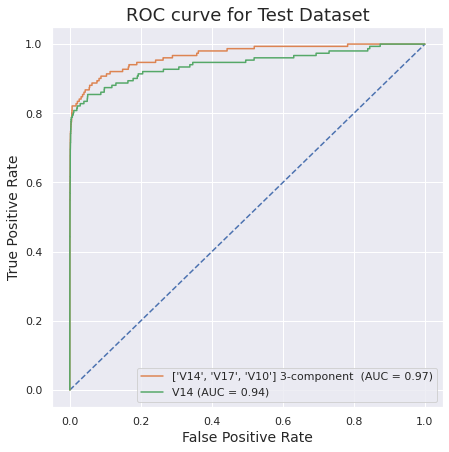

In [ ]:
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m6, tpr_m6, label= str(m6_features)+ ' 3-component ' + ' (AUC = %0.2f)' %auc_score_test_m6 )
plt.plot(fpr, tpr, label= best_feature + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')

In [ ]:
# Characteritics and performance of model 2
model6 = [m6_features, 1, 3, False,'Valid Transactions', highest_score_m6,f1_test_m6,pr_test_m6,re_test_m6]

### **Discussion**
First, let's take a look at the characteritics and performance of the above six models.
- Among all models, the top features are: **V14**, **V17**, **V10**, **V16**, **V12**
- From them, model 3 yielded the highest f1 score on the test data set, i.e., 0.68.
- It seems that 3-5 of top features yiled the best results. Increasing the number of features may ruin the performance of model.
- Gaussian models with 2 components yielded the best results. This is consisten with waht shown earlier that the data seems to have a bi-model pdf. Gaussian models with less or more than 2 components could not improve model performance.
- Oversampling the dataset to make it a balanced dataset lead to overfit. A high f1 score on trainig dataset was obtained; however, the test score was very inferior. In addition, this resulted in a large number of false positives.
- Using Two Gaussian models could not outperform single Gaussian model from the perscprive of f1 score. However, these models showed a igher precision over single Gaussian models.
- One way to increase the model is to increase the number of iterations to find the optimal threshold. However, this is computationally expensive and time consuming.

In [ ]:
model_comparison=[model1,model2,model3,model4,model5,model6]
m_index=['model1','model2','model3','model4','model5','model6']
model_comparison_df = pd.DataFrame(model_comparison,columns=model_coparison_df_columns,index=m_index)
model_comparison_df

,Features,#Gaussian Models,#Components,Oversampled,Train on,f1_score Training,f1_score Test,precision test,recall score test
model1,"[V14, V17, V10]",1,1,False,Valid Transactions,0.626039,0.575000,0.544379,0.609272
model2,"[V14, V17, V12]",1,2,False,Valid Transactions,0.728532,0.676829,0.627119,0.735099
model3,"[V14, V17, V12, V10, V11]",1,2,False,Valid Transactions,0.717241,0.685358,0.647059,0.728477
model4,"[V17, V16, V14, V10, V12]",1,2,True,All Transactions,0.903228,0.030975,0.015763,0.887417
model5,"[V14, V17, V10]",2,2,False,Valid/Fraud Transactions,0.665455,0.352332,0.809524,0.225166
model6,"[V14, V17, V10]",1,3,False,Valid Transactions,0.623269,0.584615,0.545977,0.629139


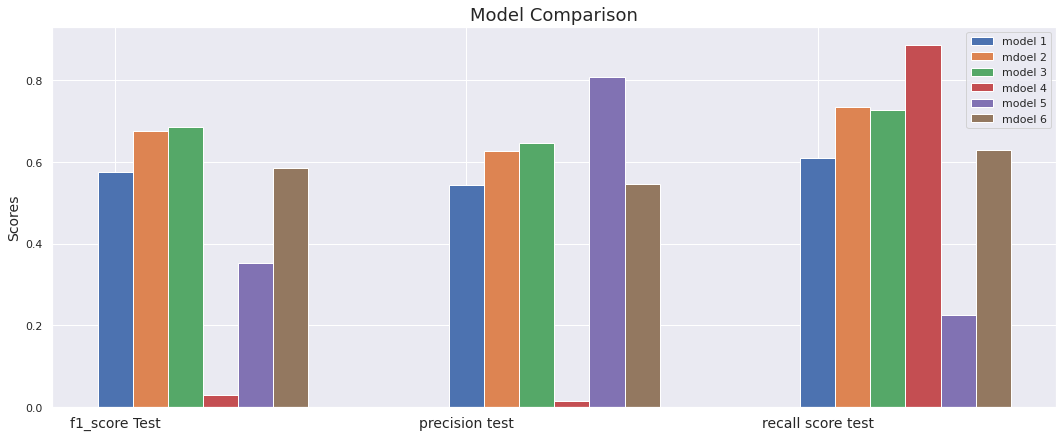

In [ ]:
labels = model_coparison_df_columns[6:]
g1_means = model_comparison_df.loc['model1'][6:]
g2_means = model_comparison_df.loc['model2'][6:]
g3_means = model_comparison_df.loc['model3'][6:]
g4_means = model_comparison_df.loc['model4'][6:]
g5_means = model_comparison_df.loc['model5'][6:]
g6_means = model_comparison_df.loc['model6'][6:]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

fig, ax = plt.subplots(figsize=(18, 7))
rects1 = ax.bar(r1, g1_means, width, label='model 1')
rects2 = ax.bar(r2, g2_means, width, label='mdoel 2')
rects3 = ax.bar(r3, g3_means, width, label='model 3')
rects4 = ax.bar(r4, g4_means, width, label='mdoel 4')
rects5 = ax.bar(r5, g5_means, width, label='model 5')
rects6 = ax.bar(r6, g6_means, width, label='mdoel 6')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size =14)
ax.set_title('Model Comparison',size = 18)
ax.set_xticks(x)
plt.xticks(size=14)
ax.set_xticklabels(labels)
ax.legend()

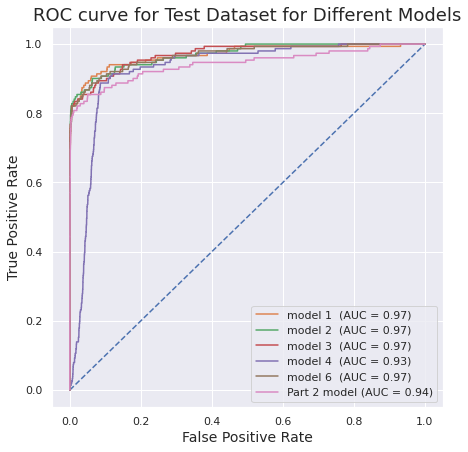

In [ ]:
#Comparing ROC curves
plt.figure(figsize=(7,7))

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_m1, tpr_m1, label= 'model 1 ' + ' (AUC = %0.2f)' %auc_score_test_m1 )
plt.plot(fpr_m2, tpr_m2, label= 'model 2 ' + ' (AUC = %0.2f)' %auc_score_test_m2 )
plt.plot(fpr_m3, tpr_m3, label= 'model 3 ' + ' (AUC = %0.2f)' %auc_score_test_m3 )
plt.plot(fpr_m4, tpr_m4, label= 'model 4 ' + ' (AUC = %0.2f)' %auc_score_test_m4 )
plt.plot(fpr_m6, tpr_m6, label= 'model 6 ' + ' (AUC = %0.2f)' %auc_score_test_m6 )


plt.plot(fpr, tpr, label= 'Part 2 model' + ' (AUC = %0.2f)' %auc_score_test )

plt.title('ROC curve for Test Dataset for Different Models',size=18)
plt.xlabel('False Positive Rate',size=14)
plt.ylabel('True Positive Rate',size=14)
plt.legend(loc='lower right')